# Here there is Only the Cleaning of the Model

In [274]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import KNNImputer


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [275]:
df1_test = pd.read_csv('Surveydata_test_cleaned_v2.csv')
df2_test = pd.read_csv('Traveldata_test_cleaned_v2.csv')

df_union_test = pd.merge(df1_test, df2_test, on = 'ID')
del df_union_test['Unnamed: 0_x']
del df_union_test['Unnamed: 0_y']

df_union_test.shape



(35602, 24)

In [276]:
df1_train = pd.read_csv('Surveydata_train_cleaned_v2.csv')
df2_train = pd.read_csv('Traveldata_train_cleaned_v2.csv')

df_union_train = pd.merge(df1_train, df2_train, on = 'ID')
del df_union_train['Unnamed: 0_x']
del df_union_train['Unnamed: 0_y']

df_union_train.shape

(94379, 25)

In [277]:
def accuracy(y_train_test, y_pred_train_test):
    cm = confusion_matrix(y_train_test, y_pred_train_test)
    tot = sum(sum(cm))
    zero = cm[0][0]
    one = cm[1][1]

    accuracy = (one + zero)/tot
    return accuracy

In [278]:
X_train = df_union_train.drop(['ID',"Overall_Experience"], axis=1) # keep it as a Matrix
y_train = df_union_train["Overall_Experience"]  # keep it as an array

X_train.shape

(94379, 23)

In [279]:
X_test = df_union_test.drop(['ID'], axis=1) # keep it as a Matrix

X_test.shape

(35602, 23)

# deep learning

In [315]:
# Fixing the seed for random number generators
np.random.seed(5)

import random
random.seed(5)

tf.random.set_seed(5)

In [316]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(23,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.3))

# Third hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='tanh')) #'tanh

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Third hidden layer with 64 neurons and relu activation function
model_1.add(Dense(32, activation='tanh'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))


# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

In [317]:
#model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
model_1.compile(loss = 'binary_focal_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy']) #0.001

model_1.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_160 (Dense)           (None, 128)               3072      
                                                                 
 dropout_120 (Dropout)       (None, 128)               0         
                                                                 
 dense_161 (Dense)           (None, 64)                8256      
                                                                 
 dropout_121 (Dropout)       (None, 64)                0         
                                                                 
 dense_162 (Dense)           (None, 32)                2080      
                                                                 
 dropout_122 (Dropout)       (None, 32)                0         
                                                                 
 dense_163 (Dense)           (None, 1)               

 SPLIT

In [283]:
X_train_train ,X_train_test , y_train_train, y_train_test = train_test_split(X_train , y_train, test_size=0.2, random_state=5, stratify= y_train)

In [318]:
numeric_features_min_max = ['Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering','Platform_Location', 'Onboard_Wifi_Service', 
                            'Onboard_Entertainment','Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 
                            'CheckIn_Service', 'Cleanliness','Online_Boarding', 'Gender', 'Customer_Type', 'Age', 'Type_Travel','Travel_Class']

numeric_features_standard = [   'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

numeric_all = numeric_features_min_max  + numeric_features_standard

numeric_transformer = Pipeline(
    steps = [ ('scaler1', MinMaxScaler() ) ,('scaler2', StandardScaler() ), ('imputer', KNNImputer(n_neighbors=5) ) ]  #, ('scaler2', StandardScaler() )
    # ('imputer', SimpleImputer(strategy='median') ), ADD LATER ON, , ('imputer',  IterativeImputer(random_state=0, initial_strategy='median') ('imputer', KNNImputer(n_neighbors=4) )
)

# Here the pre-processor step
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric1", numeric_transformer, numeric_features_min_max ),
        ("numeric2", numeric_transformer, numeric_features_standard ),
        #("numeric3", numeric_transformer, numeric_all )
    ]
)

# here the Pipeline
pipe_rf = Pipeline(
    steps = [('preprocessor', preprocessor), ('regressor', RandomForestClassifier(n_estimators = 100, n_jobs=-1) ) ]#n_estimators =1000 5min try 2k
)



#y_pred_train_train = pipe_rf.predict(X_train_train)

#metrics_score(y_train_train, y_pred_train_train)


In [285]:
X_train_train_normalized = preprocessor.fit_transform(X_train_train)


X_train_test_normalized = preprocessor.transform(X_train_test)

In [313]:
history_1 = model_1.fit(X_train_train_normalized, 
                    y_train_train,
                    validation_split=0.2, 
                    epochs=20, #150 
                    verbose=2)

Epoch 1/20
1888/1888 - 7s - loss: 0.0281 - accuracy: 0.9535 - val_loss: 0.0290 - val_accuracy: 0.9526 - 7s/epoch - 3ms/step
Epoch 2/20
1888/1888 - 6s - loss: 0.0281 - accuracy: 0.9529 - val_loss: 0.0293 - val_accuracy: 0.9519 - 6s/epoch - 3ms/step
Epoch 3/20
1888/1888 - 6s - loss: 0.0285 - accuracy: 0.9526 - val_loss: 0.0291 - val_accuracy: 0.9516 - 6s/epoch - 3ms/step
Epoch 4/20
1888/1888 - 6s - loss: 0.0279 - accuracy: 0.9531 - val_loss: 0.0289 - val_accuracy: 0.9517 - 6s/epoch - 3ms/step
Epoch 5/20
1888/1888 - 6s - loss: 0.0279 - accuracy: 0.9530 - val_loss: 0.0290 - val_accuracy: 0.9531 - 6s/epoch - 3ms/step
Epoch 6/20
1888/1888 - 6s - loss: 0.0281 - accuracy: 0.9533 - val_loss: 0.0289 - val_accuracy: 0.9532 - 6s/epoch - 3ms/step
Epoch 7/20
1888/1888 - 6s - loss: 0.0280 - accuracy: 0.9544 - val_loss: 0.0291 - val_accuracy: 0.9527 - 6s/epoch - 3ms/step
Epoch 8/20
1888/1888 - 6s - loss: 0.0275 - accuracy: 0.9532 - val_loss: 0.0288 - val_accuracy: 0.9540 - 6s/epoch - 3ms/step
Epoch 9/

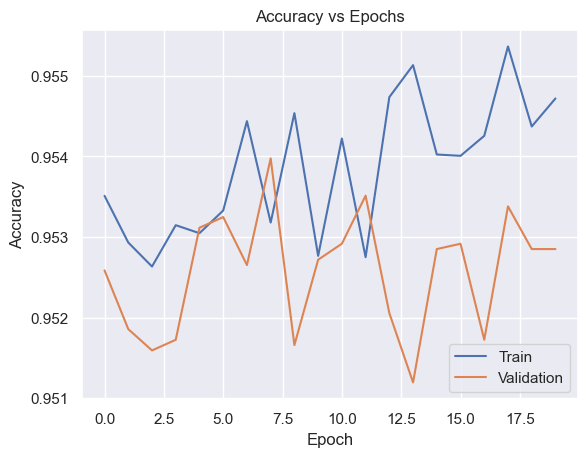

In [314]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# REAL TEST

In [319]:
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

In [320]:
history_1 = model_1.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs= 50, #150 
                    verbose=2)

Epoch 1/50
2655/2655 - 9s - loss: 0.0773 - accuracy: 0.8764 - val_loss: 0.0554 - val_accuracy: 0.9127 - 9s/epoch - 3ms/step
Epoch 2/50
2655/2655 - 8s - loss: 0.0587 - accuracy: 0.9087 - val_loss: 0.0504 - val_accuracy: 0.9213 - 8s/epoch - 3ms/step
Epoch 3/50
2655/2655 - 8s - loss: 0.0527 - accuracy: 0.9177 - val_loss: 0.0466 - val_accuracy: 0.9274 - 8s/epoch - 3ms/step
Epoch 4/50
2655/2655 - 8s - loss: 0.0485 - accuracy: 0.9230 - val_loss: 0.0423 - val_accuracy: 0.9336 - 8s/epoch - 3ms/step
Epoch 5/50
2655/2655 - 8s - loss: 0.0446 - accuracy: 0.9295 - val_loss: 0.0390 - val_accuracy: 0.9399 - 8s/epoch - 3ms/step
Epoch 6/50
2655/2655 - 8s - loss: 0.0414 - accuracy: 0.9341 - val_loss: 0.0375 - val_accuracy: 0.9442 - 8s/epoch - 3ms/step
Epoch 7/50
2655/2655 - 8s - loss: 0.0394 - accuracy: 0.9374 - val_loss: 0.0356 - val_accuracy: 0.9447 - 8s/epoch - 3ms/step
Epoch 8/50
2655/2655 - 8s - loss: 0.0377 - accuracy: 0.9401 - val_loss: 0.0337 - val_accuracy: 0.9481 - 8s/epoch - 3ms/step
Epoch 9/

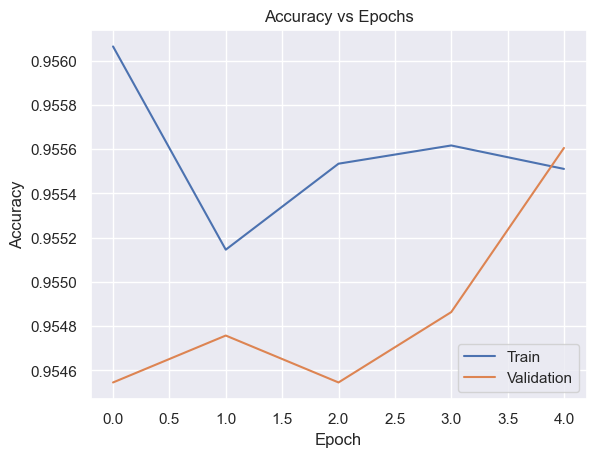

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [250]:
model_1.evaluate(X_train_normalized, y_train, verbose = 1)
test_pred = np.round(model_1.predict(X_train_normalized))

2950/2950 [==============================] - 3s 972us/step


In [244]:
right = 0
tot = 0
for i in range(len(y_train)):
    tot +=1
    if y_train.iloc[i] == int(test_pred.flatten()[i]):
        right +=1

right/tot

0.962237362125049

In [245]:
test_pred = np.round(model_1.predict(X_test_normalized))
len(test_pred.flatten())

1113/1113 [==============================] - 1s 1ms/step


35602

In [246]:
df_DL_test = df_union_test.copy()[['ID', 'Seat_Comfort' ]]
df_DL_test.rename(columns = {'Seat_Comfort' : 'Overall_Experience'}, inplace=True)
df_DL_test['Overall_Experience'] = test_pred.flatten()
df_DL_test.head()

,ID,Overall_Experience
0,99900001,1.0
1,99900002,1.0
2,99900003,1.0
3,99900004,0.0
4,99900005,1.0


In [247]:
df_DL_test.to_csv('DL_Adam_test.csv', index=None)